# Project – Student Score Prediction

The goal of this project is to build a model that can predict student exam scores based mainly on the number of hours they studied. The dataset has different factors related to student life, but for this project the focus was kept on the link between study time and exam results.

To do this, a **Linear Regression model** was used. This type of model tries to draw a straight line that best fits the data. The slope of the line shows how much the score is likely to increase for each extra hour of study, while the intercept gives the score when study hours are zero.

The dataset was divided into a training set and a testing set. The training data was used to fit the model, and the testing data was used to check how well it works on new examples. The accuracy of the model was measured using MAE, RMSE, and R² score.

The results showed a clear positive relationship: students who studied more hours usually scored higher. The regression line matched the data trend well, which means linear regression was a good choice here.

In conclusion, the project shows that study hours have a strong effect on exam performance. While there are other factors that can also influence results, this simple model highlights the importance of consistent study time in achieving better scores.


In [17]:
!pip install kaggle

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [5]:
from google.colab import files
uploaded = files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


Saving kaggle (1).json to kaggle (1).json


In [18]:
!kaggle datasets download -d yassaanwer/student-performance-factors
!unzip -o student-performance-factors.zip -d student_data


Dataset URL: https://www.kaggle.com/datasets/yassaanwer/student-performance-factors
License(s): apache-2.0
student-performance-factors.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  student-performance-factors.zip
  inflating: student_data/StudentPerformanceFactors.csv  


In [19]:
df = pd.read_csv("student_data/StudentPerformanceFactors.csv")
df.head()


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [20]:
df.info()
print(df.describe(include="all"))
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [21]:
df = df.drop_duplicates()
df = df.dropna()

print("Dataset shape after cleaning:", df.shape)
df.head()


Dataset shape after cleaning: (6378, 20)


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


✅ Using feature (study hours): Hours_Studied
✅ Using target (score):       Exam_Score


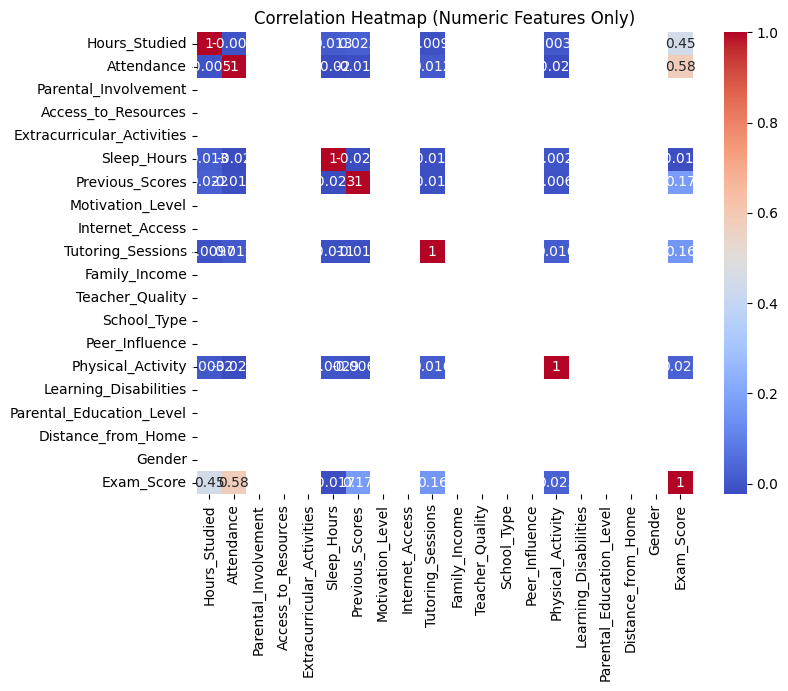

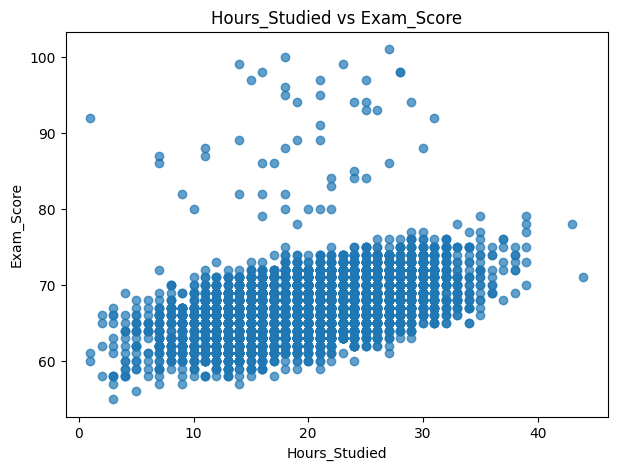

Train shape: (5102, 1) Test shape: (1276, 1)
Coefficient (slope): 0.28834270887024155
Intercept: 61.489994426101674

Sample predictions:


,Actual,Predicted
0,74,70.428618
1,66,65.238450
2,70,69.275248
3,72,67.256849
4,67,66.391820



MAE:  2.529
MSE:  12.352
RMSE: 3.515
R²:   0.205


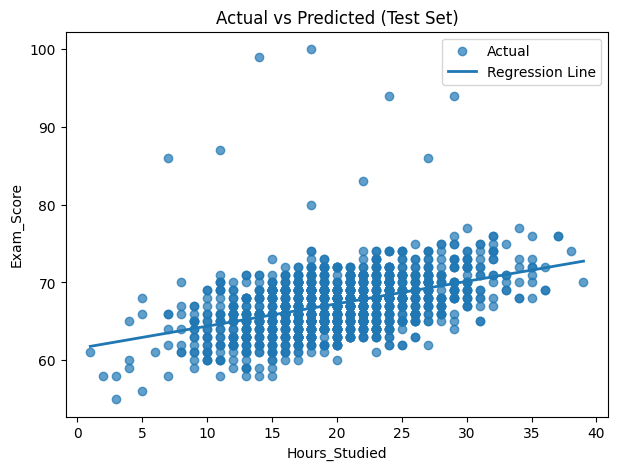

In [23]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
def _norm(col):
    return re.sub(r'[^a-z0-9]+', '', str(col).strip().lower())

norm_map = {_norm(c): c for c in df.columns}
feature_keys = [
    "hoursstudied", "studyhours", "studyhour", "studytime", "studytimehours",
    "studyduration", "hoursofstudying", "hourstudied"
]
target_keys = [
    "marks", "examscore", "finalscore", "score", "scores", "g3",
    "finalgrade", "grade", "performanceindex", "percentage", "result",
    "finalmarks", "exammarks", "totalscore"
]

feature_col = next((norm_map[k] for k in feature_keys if k in norm_map), None)
target_col  = next((norm_map[k] for k in target_keys  if k in norm_map), None)

if feature_col is None or target_col is None:
    print("❌ Could not auto-detect columns.\nAvailable columns:", list(df.columns))
    raise ValueError(
        "Need a study-hours column (e.g., 'Hours_Studied', 'Study_Hours') "
        "and a target score column (e.g., 'Exam_Score', 'Final_Score', 'Marks')."
    )

print(f"✅ Using feature (study hours): {feature_col}")
print(f"✅ Using target (score):       {target_col}")
work = df[[feature_col, target_col]].copy()
work[feature_col] = pd.to_numeric(work[feature_col], errors='coerce')
work[target_col]  = pd.to_numeric(work[target_col],  errors='coerce')
work = work.dropna()

if work.empty:
    raise ValueError(
        f"After numeric conversion there are no valid rows for '{feature_col}' and '{target_col}'. "
        "Please check your CSV values."
    )
df_numeric = df.apply(pd.to_numeric, errors='coerce')  # coerce numeric-like strings
corr = df_numeric.corr(numeric_only=True)

if corr.size > 0 and not corr.isna().all().all():
    plt.figure(figsize=(8,6))
    sns.heatmap(corr, annot=True, cmap="coolwarm")
    plt.title("Correlation Heatmap (Numeric Features Only)")
    plt.show()
else:
    print("ℹ️ Skipping heatmap: no numeric columns detected.")
plt.figure(figsize=(7,5))
plt.scatter(work[feature_col], work[target_col], alpha=0.7)
plt.xlabel(feature_col)
plt.ylabel(target_col)
plt.title(f"{feature_col} vs {target_col}")
plt.show()
X = work[[feature_col]]  # 2D
y = work[target_col]     # 1D
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print("Train shape:", X_train.shape, "Test shape:", X_test.shape)
model = LinearRegression()
model.fit(X_train, y_train)

print("Coefficient (slope):", model.coef_[0])
print("Intercept:", model.intercept_)
y_pred = model.predict(X_test)
comparison = pd.DataFrame({ "Actual": y_test.values, "Predicted": y_pred })
print("\nSample predictions:")
display(comparison.head())
mae  = mean_absolute_error(y_test, y_pred)
mse  = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2   = r2_score(y_test, y_pred)

print(f"\nMAE:  {mae:.3f}")
print(f"MSE:  {mse:.3f}")
print(f"RMSE: {rmse:.3f}")
print(f"R²:   {r2:.3f}")
plt.figure(figsize=(7,5))
plt.scatter(X_test[feature_col], y_test, label="Actual", alpha=0.7)
order = np.argsort(X_test[feature_col].values)
plt.plot(
    X_test[feature_col].values[order],
    y_pred[order],
    linewidth=2,
    label="Regression Line"
)
plt.xlabel(feature_col)
plt.ylabel(target_col)
plt.title("Actual vs Predicted (Test Set)")
plt.legend()
plt.show()


In [25]:
X = work[[feature_col]]
y = work[target_col]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)


Train shape: (5102, 1) Test shape: (1276, 1)


In [26]:
model = LinearRegression()
model.fit(X_train, y_train)

print("Coefficient (slope):", model.coef_[0])
print("Intercept:", model.intercept_)


Coefficient (slope): 0.28834270887024155
Intercept: 61.489994426101674


In [27]:
y_pred = model.predict(X_test)

comparison = pd.DataFrame({
    "Actual": y_test.values,
    "Predicted": y_pred
})
comparison.head()


,Actual,Predicted
0,74,70.428618
1,66,65.238450
2,70,69.275248
3,72,67.256849
4,67,66.391820


In [28]:
mae  = mean_absolute_error(y_test, y_pred)
mse  = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2   = r2_score(y_test, y_pred)

print(f"MAE:  {mae:.2f}")
print(f"MSE:  {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²:   {r2:.2f}")


MAE:  2.53
MSE:  12.35
RMSE: 3.51
R²:   0.21


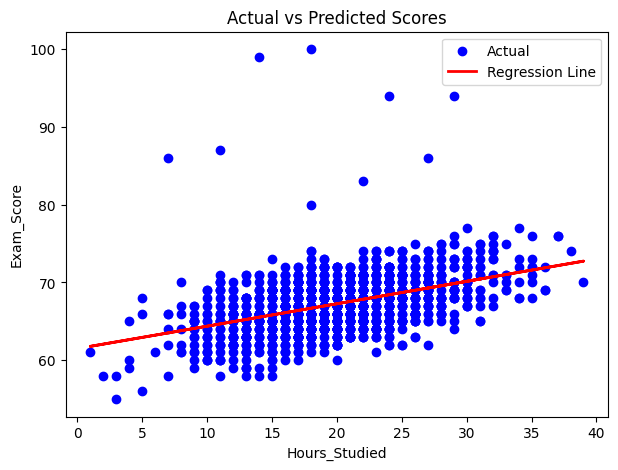

In [29]:
plt.figure(figsize=(7,5))
plt.scatter(X_test[feature_col], y_test, color="blue", label="Actual")
plt.plot(X_test[feature_col], y_pred, color="red", linewidth=2, label="Regression Line")
plt.xlabel(feature_col)
plt.ylabel(target_col)
plt.title("Actual vs Predicted Scores")
plt.legend()
plt.show()
